In [63]:
import pandas as pd
import numpy as np

In [64]:
import math

In [65]:
%cp /content/drive/MyDrive/BR_mod.csv ./

In [66]:
df = pd.read_csv("BR_mod.csv")

In [67]:
df

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.0,1.0,1.0,1.0,1,2.0,0.0,NaN,0.0,13.0,0.0,3.0,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.0,1.0,1.0,0.0,1,1.0,0.0,0.0,1.0,15.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,NaN,1.0,1.0,1.0,1,1.0,0.0,0.0,0.0,23.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.0,1.0,1.0,3.0,1,1.0,0.0,0.0,1.0,2.0,2.0,NaN,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.0,1.0,1.0,1.0,1,2.0,0.0,0.0,1.0,14.0,0.0,2.0,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.0,1.0,1.0,0.0,1,2.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37
1093,46,1.4,3.0,1.0,1.0,1.0,1,2.0,0.0,0.0,0.0,22.0,0.0,2.0,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38
1094,68,0.8,NaN,1.0,1.0,3.0,1,2.0,0.0,0.0,0.0,11.0,0.0,2.0,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38
1095,61,0.8,3.0,1.0,1.0,2.0,1,2.0,0.0,0.0,0.0,5.0,1.0,2.0,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39


In [68]:
df.columns

Index(['patient.age_at_initial_pathologic_diagnosis',
       'patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision',
       'patient.axillary_lymph_node_stage_method_type',
       'patient.breast_carcinoma_estrogen_receptor_status',
       'patient.breast_carcinoma_progesterone_receptor_status',
       'patient.breast_carcinoma_surgical_procedure_name', 'patient.gender',
       'patient.histological_type', 'patient.history_of_neoadjuvant_treatment',
       'patient.initial_pathologic_diagnosis_method',
       'patient.lab_proc_her2_neu_immunohistochemistry_receptor_status',
       'patient.lymph_node_examined_count', 'patient.margin_status',
       'patient.menopause_status',
       'patient.number_of_lymphnodes_positive_by_he', 'patient.other_dx',
       'patient.person_neoplasm_cancer_status', 'patient.race_list.race',
       'patient.stage_event.pathologic_stage',
       'patient.stage_event.tnm_categories.pathologic_categories.pathologic_m',
       'patient.stage_ev

In [69]:
df.median()

patient.age_at_initial_pathologic_diagnosis                              58.0
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision      0.8
patient.axillary_lymph_node_stage_method_type                             3.0
patient.breast_carcinoma_estrogen_receptor_status                         1.0
patient.breast_carcinoma_progesterone_receptor_status                     1.0
patient.breast_carcinoma_surgical_procedure_name                          1.0
patient.gender                                                            1.0
patient.histological_type                                                 1.0
patient.history_of_neoadjuvant_treatment                                  0.0
patient.initial_pathologic_diagnosis_method                               0.0
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status            0.0
patient.lymph_node_examined_count                                         9.0
patient.margin_status                                           

In [70]:
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

In [71]:
df

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,patient.lab_proc_her2_neu_immunohistochemistry_receptor_status,patient.lymph_node_examined_count,patient.margin_status,patient.menopause_status,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.0,1.0,1.0,1.0,1,2.0,0.0,0.0,0.0,13.0,0.0,3.0,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.0,1.0,1.0,0.0,1,1.0,0.0,0.0,1.0,15.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,3.0,1.0,1.0,1.0,1,1.0,0.0,0.0,0.0,23.0,0.0,2.0,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.0,1.0,1.0,3.0,1,1.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.0,1.0,1.0,1.0,1,2.0,0.0,0.0,1.0,14.0,0.0,2.0,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,77,0.0,1.0,1.0,1.0,0.0,1,2.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2,1,4,0.0,37
1093,46,1.4,3.0,1.0,1.0,1.0,1,2.0,0.0,0.0,0.0,22.0,0.0,2.0,5.0,0.0,0.0,2.0,8.0,2,10,4,0.0,38
1094,68,0.8,3.0,1.0,1.0,3.0,1,2.0,0.0,0.0,0.0,11.0,0.0,2.0,0.0,0.0,0.0,2.0,6.0,2,0,8,0.0,38
1095,61,0.8,3.0,1.0,1.0,2.0,1,2.0,0.0,0.0,0.0,5.0,1.0,2.0,3.0,1.0,0.0,2.0,8.0,2,5,8,0.0,39


In [72]:
data = df.to_numpy()

In [73]:
type(data)

numpy.ndarray

In [74]:
length = data.shape[0]
print(length)

1097


In [85]:
k_values = np.arange(2, 11, 1)
print(k_values)
cost_values = []

[ 2  3  4  5  6  7  8  9 10]


In [76]:
def cost_cal(centroid, Z):                  # Calculating the euclidian distance to find cost for particular cluster
  cost = 0
  for i, x in enumerate(data):
    j = int (Z[i])
    y = centroid[j]
    cost += np.linalg.norm(y - x)
  return cost

In [77]:
def cluster(centroid, K):                   # Function to find the cluster with given K centroid
  Y = np.zeros(length)
  for i, x in enumerate(data):
      dist = np.zeros(K)
      for j, y in enumerate(centroid):
        dist[j] = np.linalg.norm(y - x)
      Y[i] = np.argmin(dist)
  return Y  

In [81]:
def K_mediod_clustering(K = 2):
  
  centroid = (df.sample(n=K)).to_numpy()    # Randomly select K centroid
  Y = cluster(centroid, K)  
  cost = cost_cal(centroid, Y)
  iter = 0
  while (1):                                # Run to find minimum cost
    change = False
    for i, x in enumerate(data):            # Changing medoid to one of non-medoid data points
      new_centroid = centroid             
      if x.tolist() in centroid.tolist():   # If data point is already a medoid
        continue
      z = int(Y[i])                         
      new_centroid[z] = x
      Z = cluster(new_centroid, K)          # Finding clusters with new medoid
      new_cost = cost_cal(new_centroid, Z)  # New Cost
      iter += 1
      if(iter%1000==0):
        print(iter)
      if (new_cost < cost):                 # If new cost is less than original cost
        cost = new_cost
        Y = Z
        centroid = new_centroid             # New Centroid
        change = True
        break
    if change == False:                     # If no change in last iteration of data point then minimum cost is found
      break
  #print(iter)                              # Printing No. of iterations taken to find minimum cost
  
  cost_values.append(cost)
  return Y, cost, centroid

In [86]:
for k in k_values:
  K_mediod_clustering(k)

1000
2000
3000
4000
4589
1000
2000
3000
4000
4960
1000
2000
3000
4000
5000
6000
6720
1000
2000
3000
4000
5000
5769
1000
2000
3000
4000
5000
6000
7000
8000
8046
1000
2000
3000
4000
5000
5756
1000
2000
3000
4000
5000
6000
7000
8000
9000
9623
1000
2000
3000
4000
5000
6000
6074
1000
2000
3000
4000
5000
5344


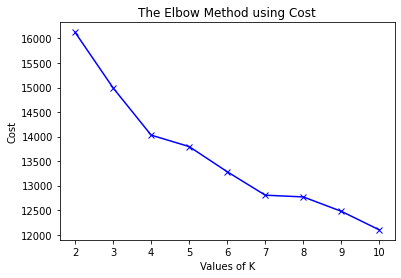

In [87]:
import matplotlib.pyplot as plt
plt.plot(k_values, cost_values, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Cost')
plt.title('The Elbow Method using Cost')
plt.show()

In [89]:
Y, cost, centroid = K_mediod_clustering(7)
print(Y)
print(cost)
print(centroid)

1000
2000
3000
4000
5000
6000
7000
7656
[1. 1. 0. ... 2. 2. 3.]
12792.888511045756
[[72.   1.6  3.   1.   1.   1.   1.   2.   0.   0.   1.  31.   0.   2.
   5.   0.   0.   2.   8.   0.  10.   5.   0.  30. ]
 [29.   0.   0.   1.   1.   3.   1.   1.   0.   0.   1.  21.   0.   2.
  14.   0.   0.   1.  10.   2.  12.   8.   1.  32. ]
 [61.   0.8  3.   1.   1.   2.   1.   2.   0.   0.   0.   5.   1.   2.
   3.   1.   0.   2.   8.   2.   5.   8.   0.  39. ]
 [46.   0.8  3.   1.   1.   0.   1.   2.   0.   6.   0.   2.   0.   3.
   0.   0.   0.   2.   1.   0.   0.   4.   0.  39. ]
 [80.   1.8  4.   1.   1.   0.   1.   2.   0.   0.   0.   4.   0.   2.
   0.   0.   0.   2.   1.   2.   0.   4.   0.  29. ]
 [61.   1.   4.   1.   0.   0.   1.   1.   0.   0.   0.   3.   0.   2.
   0.   0.   0.   1.   5.   2.   1.   5.   1.  25. ]
 [77.   1.8  0.   1.   1.   1.   1.   1.   0.   0.   0.  18.   0.   2.
   7.   0.   0.   1.   8.   2.  10.   5.   1.  25. ]]


In [96]:
def find(x):
  org = x
  while (clusters[x] != x):
    x = clusters[x]
  par = x
  x = org 
  while (clusters[x] != par):
    clusters[x] = par
    x = clusters[x]
  return par

In [97]:
clusters = [1, 1, 2, 4, 5, 6, 1, 8, 9, 10]

In [98]:
find(6)

1

In [36]:
print(centroid)

[[51.   0.8  0.   1.   0.   0.   1.   1.   0.   0.   1.  19.   1.   2.
  17.   0.   0.   2.  10.   2.  11.   5.   1.  18. ]
 [71.   0.8  0.   1.   1.   1.   1.   1.   0.   6.   1.  14.   0.   2.
   0.   0.   0.   2.   5.   0.   0.   5.   0.   9. ]]


In [61]:
print(centroid)

[[68.   0.8  3.   1.   1.   3.   1.   2.   0.   0.   0.  11.   0.   2.
   0.   0.   0.   2.   6.   2.   0.   8.   0.  38. ]
 [46.   0.8  3.   1.   1.   0.   1.   2.   0.   6.   0.   2.   0.   3.
   0.   0.   0.   2.   1.   0.   0.   4.   0.  39. ]]
